# Deeplab paris 192

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from learn import *

In [10]:
num_slice = 9
sz = 192

num_gpus = 4
gpu_start = 4
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
torch.cuda.set_device(gpu_start)
bs = 10 * num_gpus

In [11]:
learn, denorm, data = learner_on_dataset(datapaths[0], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True, num_slice=num_slice, sz=sz)
(trn_x,trn_y), (val_x,val_y) = data

HBox(children=(IntProgress(value=0, description='ims', max=803), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ims', max=345), HTML(value='')))

AttributeError: 'PublicArrayDataset' object has no attribute 'num_slice'

In [ ]:
learn.data.trn_ds.sz

In [8]:
#resume
learn, denorm, data = learner_on_dataset(datapaths[1], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True, data=data)
(trn_x,trn_y), (val_x,val_y) = data

Data finished loading: data/train/AOI_2_Vegas_Train


In [6]:
learn.freeze_to(1)
learn.lr_find()
learn.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/607 [00:00<?, ?it/s]


RuntimeError: element 0 of variables does not require grad and does not have a grad_fn

In [4]:
%%time
lr = 1e-3 / 2
lrs = np.array([lr/9, lr])
wd = 0.025
wds = [wd/9, wd]
learn.freeze_to(1)
train_and_plot(learn, 0, 'deeplab-vegas', lrs=lrs, n_cycles=3, wds=wds, use_wd_sched=False, cycle_len=2, cycle_mult=2, best_save_name='deeplab-vegas')

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

  0%|          | 0/607 [00:00<?, ?it/s]

RuntimeError: element 0 of variables does not require grad and does not have a grad_fn

HBox(children=(IntProgress(value=0, description='Epoch', max=30), HTML(value='')))

epoch      trn_loss   val_loss   jaccard_coef_parallel       
    0      0.378657   0.37801    1e-06     
    1      0.347352   0.324806   1e-06                       
    2      0.315907   0.291912   1e-06                       
    3      0.289615   0.352592   1e-06                       
    4      0.273067   0.250963   2e-06                       
 97%|█████████▋| 590/607 [18:27<00:31,  1.88s/it, loss=0.271]    5      0.268496   0.249856   2e-06     
    6      0.258374   0.288052   0.000332                    
    7      0.243523   0.327445   0.138571                    
 46%|████▌     | 278/607 [08:27<10:01,  1.83s/it, loss=0.243]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    10     0.215181   0.269057   0.155929                    
    11     0.212866   0.254074   0.158155                    
    12     0.210433   0.240394   0.158856                    
 46%|████▌     | 278/607 [06:56<08:12,  1.50s/it, loss=0.209]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    16     0.203217   0.597872   0.158897                    
    17     0.192635   0.814432   0.15865                     
    18     0.188896   0.282996   0.147353                    
    19     0.185385   4.533114   0.116431                    
    20     0.180259   0.707025   0.10361                     
 17%|█▋        | 106/607 [02:39<12:32,  1.50s/it, loss=0.178]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    23     0.169872   6.420264   0.161948                    
    24     0.169946   72.604401  0.162731                    
    25     0.164225   20.229185  0.098745                    
    26     0.164172   9.371172   0.109341                    
    27     0.162235   7.559909   0.058712                    
    28     0.159871   8.944091   0.082047                    
    29     0.162729   12.10084   0.023874                    

CPU times: user 3d 16h 32min 11s, sys: 2d 12h 9min 52s, total: 6d 4h 42min 4s
Wall time: 11h 47min 47s


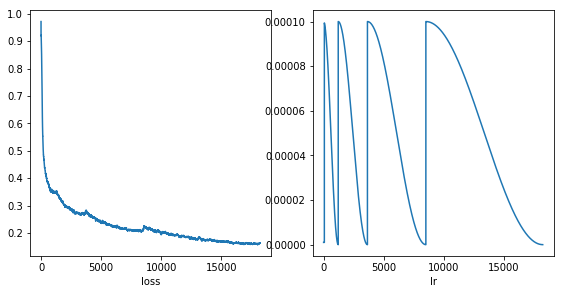

In [5]:
%%time
lr = 1e-4
lrs = np.array([lr/9, lr])
wd = 0.025
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-vegas', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=False,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-vegas')

In [ ]:
%%time
lr = 1e-4 / 2
lrs = np.array([lr/9, lr])
wd = 0.025
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-vegas', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-vegas')

HBox(children=(IntProgress(value=0, description='Epoch', max=30), HTML(value='')))

epoch      trn_loss   val_loss   jaccard_coef_parallel       
    0      0.16724    5.742593   0.161536  
    1      0.160605   6.001261   0.164051                    
    2      0.166237   35.061625  0.162525                    
 92%|█████████▏| 557/607 [13:48<01:14,  1.49s/it, loss=0.164]    3      0.161822   0.282629   0.097137  
    4      0.159656   0.785932   0.097261                    
    5      0.156003   0.747153   0.09322                     
    6      0.171056   0.214163   0.113464                    
    7      0.16258    0.316334   0.080068                    
    8      0.162839   0.146672   0.098992                    
    9      0.158199   0.70813    0.060815                    
 97%|█████████▋| 587/607 [14:38<00:29,  1.50s/it, loss=0.153]    10     0.1551     1.23132    0.05933   
    11     0.155144   0.847217   0.073925                    
    12     0.151718   0.484393   0.101714                    
    13     0.152064   1.090048   0.072482                    
 7

In [7]:
def plot_lr_loss(learn, save_name=None):
    # plot
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    fig.tight_layout()
    ax[0].plot(learn.sched.iterations, learn.sched.losses)
    ax[0].set_xlabel('loss')
    ax[1].plot(learn.sched.iterations, learn.sched.lrs)
    ax[1].set_xlabel('lr')
    if save_name is not None:
        save_path = Path('data/figs')
        if not save_path.exists(): save_path.mkdir(parent=True)
        fig.savefig(str(save_path / Path(save_name)) + '.png')

In [10]:
learn.save('vegas-deeplab2')

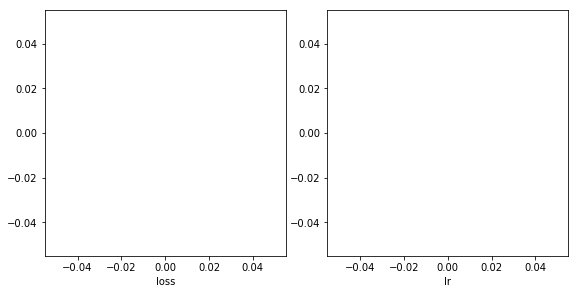

In [8]:
plot_lr_loss(learn, 'vegas-deeplab')

In [3]:
learn, denorm, data = learner_on_dataset(datapaths[2], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True)
(trn_x,trn_y), (val_x,val_y) = data

HBox(children=(IntProgress(value=0, description='ims', max=3207), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ims', max=1375), HTML(value='')))


Data finished loading: data/train/AOI_4_Shanghai_Train


In [7]:
learn, denorm, data = learner_on_dataset(datapaths[2], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True, data=data)
(trn_x,trn_y), (val_x,val_y) = data

Data finished loading: data/train/AOI_4_Shanghai_Train


In [4]:
def mask_acc(pred,targ): return accuracy_multi(pred[:,0], targ, 0.)
learn.metrics=[mask_acc]

In [ ]:
%%time
lr = 1e-4 / 2
lrs = np.array([lr/9, lr])
wd = 0.025
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-shanghai', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=False,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-shanghai')

HBox(children=(IntProgress(value=0, description='Epoch', max=30), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc                    
    0      0.206264   0.285697   0.930817  
    1      0.18669    0.562764   0.932541                    
    2      0.188747   0.888247   0.938737                    
    3      0.176683   0.333036   0.931994                    
    4      0.171012   3.070413   0.920568                    
 28%|██▊       | 205/722 [05:06<12:53,  1.50s/it, loss=0.17] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    8      0.173465   0.847559   0.941631                    
    9      0.164698   0.144767   0.9472                      
    10     0.15962    0.310504   0.939998                    
 64%|██████▍   | 461/722 [11:33<06:32,  1.50s/it, loss=0.159]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 90%|█████████ | 653/722 [16:17<01:43,  1.50s/it, loss=0.165]    14     0.168236   0.601937   0.941151  
    15     0.161572   0.129493   0.94827                     
    16     0.170449   0.161715   0.942396                    
  7%|▋         | 49/722 [01:14<17:05,  1.52s/it, loss=0.159]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 99%|█████████▉| 718/722 [17:53<00:05,  1.50s/it, loss=0.156]    19     0.155098   0.127132   0.951167  
    20     0.157886   0.135479   0.948155                    
    21     0.152242   0.125819   0.949255                    
  7%|▋         | 49/722 [01:13<16:55,  1.51s/it, loss=0.149] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    24     0.141527   0.167676   0.929055                    
    25     0.142228   0.27359    0.923952                    
    26     0.137253   0.213823   0.933296                    
    27     0.140255   0.232538   0.925686                    
 83%|████████▎ | 597/722 [14:39<03:04,  1.47s/it, loss=0.137]